### i. Why XGBoost became so popular?

There are two aspects that made XGBoost so popular:

**i.** The first one is `regularized learning objective` that allows for better pruning of trees.


**ii.** Secondly, is being able to distribute the **Gradient Boosting learning process** across multiple threads or machines, allowing it to handle larger scales of data.

**=>** Boosting algorithms have been known to perform very well on most large datasets, but the iterative process of boosting makes those painfully slow.

### ii. How can we parallelize the XGBoost algorithm then?

In the case of **Random Forest**, it is easy, we just distribute the data across threads, build independent trees there, and average the resulting tree predictions.

However, in the case of an iterative process like **boosting**, **we need to parallelize the tree building itself**. It all comes down to how we find an optimal split in a tree -- for each feature, sort the data and linearly scan the feature to find the best split. If you have **m** samples and **n** features, it is **`O(mnlog(m))`** time complexity at each node.

In pseudo code:

```best_split = None
for feature in features:
    for sample in sorted samples:
   if split is better than best_split:
          best_split = f(feature, sample)```

**So we can parallelize split search by scanning each feature independently and reduce the resulting splits to the optimal one.**

XGBoost is not the first attempt to parallelize GBM, but they used a series of tricks that made it very efficient: 

- First, all the columns are pre-sorted while keeping a pointer to the original index of the entry. This removes the need to sort the feature at every search.

- They used a **Compressed Column Format** for a more efficient distribution of the data.

- They used a cache-aware prefetching algorithm to minimize the non-contiguous memory access that results from the pre-sorting step.

- Not directly about parallelization, but they came out with an **approximated split search algorithm** that speeds the tree building further.

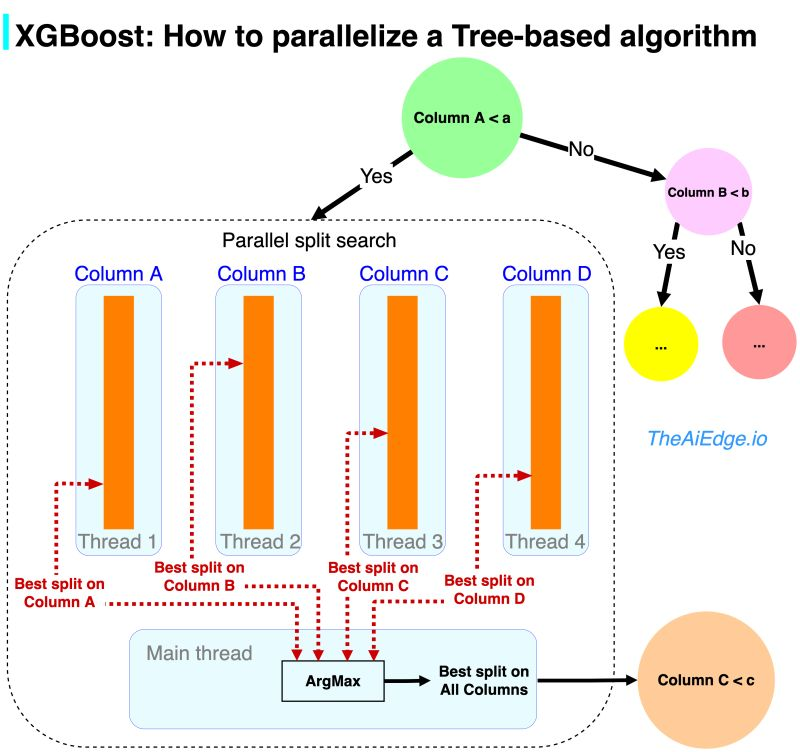

As of today, we can train XGBoost across cores on the same machine, but also on AWS YARN, Kubernetes, Spark, and GPU and we can also use Dask or Ray to do it.

**NOTE:** One thing to look out for is that there is a limit to how much XGBoost can be parallelized. With too many threads, the data communication between threads becomes a bottleneck and the training speed plateaus. Here is a example explaining that effect: **https://lnkd.in/d9SEcQuV**